# <strong> C-2

# <strong>Questão A:
    Explique a metodologia para criar a animação em cada um dos casos (versões). Comente-as. Justifique.


<strong>Resposta</strong>
O método utilizado foi o plot scatter utilizando como variáveis o avançar dos anos, demonstrando a alteração da esperança de vida e GDP per capita na função animate.\

Na versão *gapminder_animation* criaram a animação a partir do código: `for i in data.year.unique():` que forma uma nova imagem para cada ano. `i` corresponde a um ano e para cada ano `i` cria-se uma imagem diferente.

Na versão *gapminder_animation-FuncAnimation_PLOT_SEM-legend* a animação foi criada pelo código: `ani = animation.FuncAnimation`, que usa a função `def animate(i)`. Visto que não há divisão, é criada uma animação que se aplica às imagens anteriores. 

# <strong>Questão B
    Temos “bolhas” de cinco (5) cores diferentes. O que representa cada cor? Justifique, com descrição detalhada do processo.

<strong>Resposta</strong>

Cada uma das cores representa cada um dos diferentes continentes:\
Cinzento = Oceânia\
Castanho = América(s)\
Azul = África\
Laranja = Europa\
Verde = Ásia\


A coluna `"continent"`  é estabelecida por `data["continent"] = pd.Categorical(data["continent"])`. O código `c = tmp["continent"].cat.codes` faz com que haja uma atribuição de cores diferentes a cada um dos continente, de maneira a que todas as bolhas possam ser associadas e diferenciadas a um diferente continente.

Os mapas de cor são dados a partir do código `Accent`\
A opacidade da cor pode ser indicada a partir do código `alpha = 0.6`



# <strong>Questão C
    Inserir uma legenda ou legendas com a cor das “bolhas” e o seu significado, posicionada(s) em área(s) que não se sobreponha(m) às “bolhas”. Fundamente as opções tomadas.

<strong>Resposta</strong>

Introduzimos o código `nomes_continentes = data["continent"].unique().`para criar a legenda\
Para armazenar o que as labels contêm numa variável, para usar uma só variável e para colocar a legenda utilizamos o código `plt.legend(handles = scut.legend_elements()[0], labels = nomes_continentes, loc = 4,  title = "Continentes")`

Chamamos os elementos do gráfico para definir `handles`, através da variável `scut` em que estava armazenado (`handles = scut.legend_elements()[0]`). \
Usamos o código: (`nomes_continentes = data["continent"].unique()`) de forma a definir as labels como os elementos únicos da coluna "continent".

A legenda localiza-se no canto inferior direito (`loc = 4`) para não haver sobreposição com nenhum dos círculos.\
Uma vez que cores diferentes representam continentes diferentes, atribuimos o título "Continente" - `title = "Continentes"`.

In [2]:
#Bibliotecas
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
my_dpi=96

In [5]:
#Buscar o df
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
data = pd.read_csv(url)

data.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [6]:
#Transformar a coluna categórica (continente) num grupo de valores numéricos group1->1, group2->2...
data['continent']=pd.Categorical(data['continent'])

In [7]:
anos=data.year.unique()

<IPython.core.display.Javascript object>


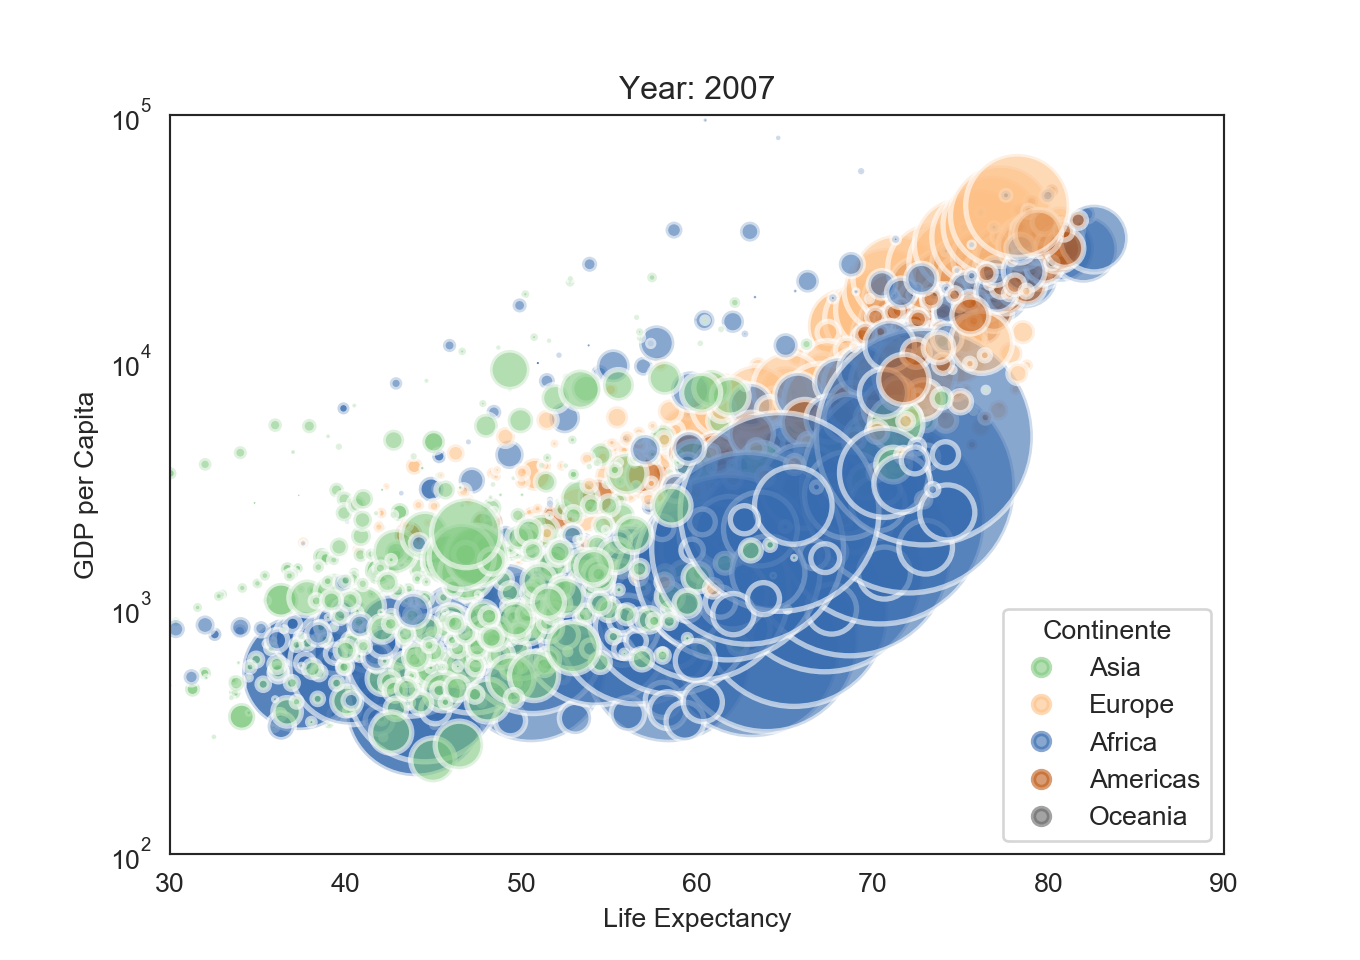

In [11]:
%matplotlib notebook
%matplotlib notebook

#Iniciar a figura
#fig=plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)
fig, ax = plt.subplots(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)

#Títulos
plt.yscale('log')
plt.xlabel("Life Expectancy")
plt.ylabel("GDP per Capita")
plt.ylim(100,100000)
plt.xlim(30, 90)

def animate(i):
    plt.title("Year: "+str(anos[i]) )
    tmp = data[ data.year == anos[i] ]
    scut = plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    
    #Adição e posição da legenda
    variavel = scut.legend_elements()[0]
    nomes_continentes = data["continent"].unique()
    plt.legend(handles = variavel, 
               labels = nomes_continentes, 
               loc = 4,  
               title = "Continente")
    
ani = animation.FuncAnimation(fig, animate, frames=len(anos), interval = 150, blit = False, repeat = False)


plt.show()